In [1]:
# Import general modules
import pandas as pd
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [40]:
# Read in teams data
teams = pd.read_csv('Teams.csv')

In [51]:
# Create myteams dataframe 
myteams = teams[['yearID', "teamID", 'lgID', 'G', 'W', 'L', 'R', 'RA']] [teams['yearID'] > 2000]

In [52]:
# Create 'RunDiff' and 'Winpct' columns in dataframe
myteams['RunDiff'] = myteams['R'] - myteams['RA']
myteams['Winpct'] = myteams['W'] / (myteams['W'] + myteams['L'])

In [53]:
# Create scatter plot of RunDiff vs. Winpct
plot = px.scatter(myteams, x='RunDiff', y='Winpct', trendline='ols')
plot.show()

In [54]:
# For QQ Plots
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

In [60]:
# Create polynomial scatter plot
poly = px.scatter(myteams, x='RunDiff', y=myteams['Winpct']**2)
poly.show()

In [62]:
# Create linear negative scatter plot
neg = px.scatter(myteams, x='RunDiff', y=myteams['Winpct']*-1)
neg.show()

In [63]:
# Create linear reciprocal scatter plot
recip = px.scatter(myteams, x='RunDiff', y=1/myteams['Winpct'])
recip.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7496\3169395541.py:2: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7496\3169395541.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



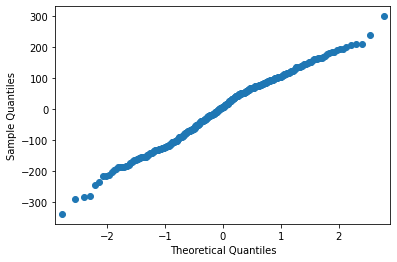

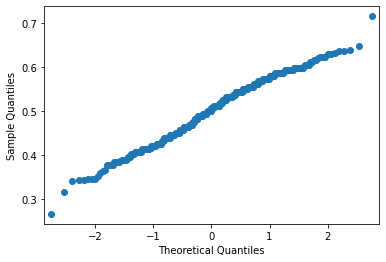

In [64]:
# Create QQ plot to check normality of distribution
normcheck1 = qqplot(myteams['RunDiff'])
normcheck1.show()
normcheck2 = qqplot(myteams['Winpct'])
normcheck2.show()

In [65]:
#Create Model for for RunDiff vs. Winpct
model = smf.ols(formula = 'Winpct ~ RunDiff', data = myteams).fit()
#Predict Winning Precentage, Wins using model we just fit
myteams['predictedWinpct'] = model.predict()
myteams['predictedW'] = round(myteams['W']+myteams['L'])*myteams['predictedWinpct']

In [67]:
# Show us actual data vs predicted data
myteams[['Winpct', 'predictedWinpct', 'W', 'predictedW']]

,Winpct,predictedWinpct,W,predictedW
2355,0.462963,0.475504,75,77.031630
2356,0.391304,0.410829,63,66.143426
2357,0.509317,0.516946,82,83.228341
2358,0.512346,0.501876,83,81.303958
2359,0.561728,0.547714,91,88.729670
...,...,...,...,...
2710,0.487654,0.485551,79,78.659183
2711,0.469136,0.462946,76,74.997188
2712,0.580247,0.543319,94,88.017616
2713,0.543210,0.573458,88,92.900276


In [68]:
#Find Model Residuals to check normality
influence = model.get_influence()
residuals = influence.resid_studentized_internal

In [13]:
# Import necessary modules
import numpy as np
import plotly.offline as po
import plotly.graph_objs as go

In [69]:
# Create Residual Plot and Highlight Outliers (points with residual values > 2.8 or < -2.8) using go.Scatter from plotly
residplot = go.Scatter(
    x = myteams['RunDiff'],
    y = residuals,
    mode = 'markers',
    marker = dict(
       color = 
        pd.Series(np.where(residuals>2.8, 'outlier', np.where(residuals<-2.8, 'outlier', 'normal')))
        .astype(str).map({'normal': 0, 'outlier': 1}),
        colorscale = [[0, 'blue'], [1, 'red']]
       )
     
    )
po.plot([residplot])

'temp-plot.html'

In [33]:
# Pythagorean Formula for k = 1.83 (widely accepted arbitrary value for k) and checking nominal residuals and fit OLS line
from scipy import signal
myteams['PythWpct'] = myteams['R']**1.83 / (myteams['R']**1.83 + myteams['RA']**1.83)
plot2 = px.scatter(myteams, x = 'W', y = 'PythWpct', trendline = 'ols')
plot2.show()